In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats # = from scipy.stats import *
import math as mt

The mean is the usual average
,The median is the middle value, so first I ll have to rewrite the list in numerical order
,The mode is the number that is repeated more often than any other

# Uniform Distribution

In [2]:
unif= np.random.uniform(0,1,10000)


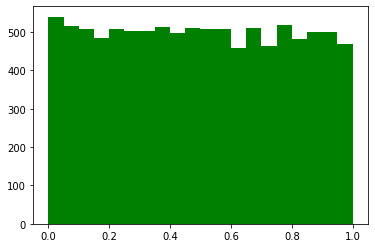

In [3]:
plt.hist(unif,bins=20,color='g');

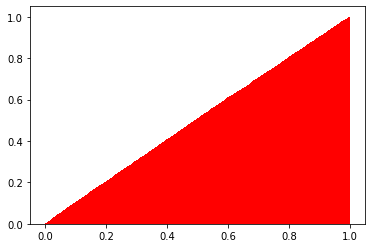

In [4]:
# CDF
plt.hist(unif,bins=500,density=True,cumulative=True,histtype='barstacked',color='r');

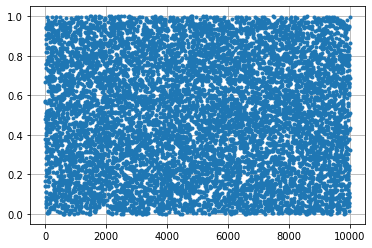

In [5]:
plt.plot(unif,'.')
plt.grid()

In [6]:
[np.mean(unif),np.median(unif)]

[0.494452320143621, 0.49133093733617167]

In [7]:
stats.mode(unif)

ModeResult(mode=array([9.39705988e-06]), count=array([1]))

In [8]:
stats.kurtosis(unif)

-1.2006251309513412

In [9]:
stats.skew(unif)

0.017779470066514553

# Normal Distribution


In [20]:
norm =np.random.normal(0,10,size=10000)
norm2=np.random.normal(0,5,size=10000)

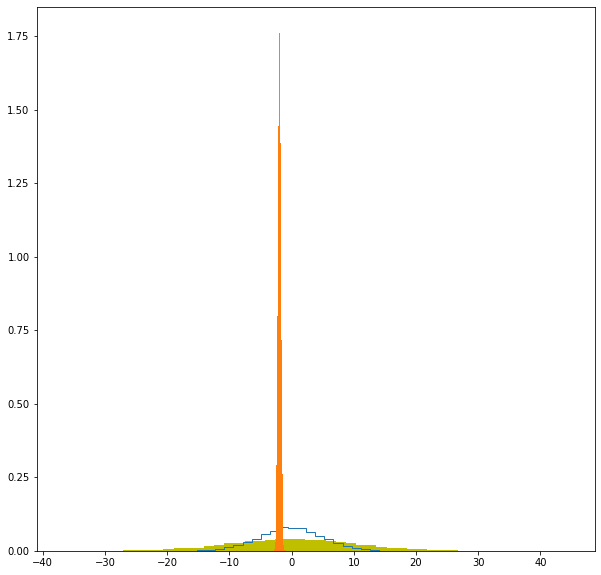

In [45]:
fig=plt.figure(figsize=(10,10))
plt.hist(norm,bins=50,color='y',density=True);#density=True make PDE (normalized)
plt.hist(norm2,bins=25,density=True,histtype='step');
plt.hist(new_norm,bins=25,density=True);

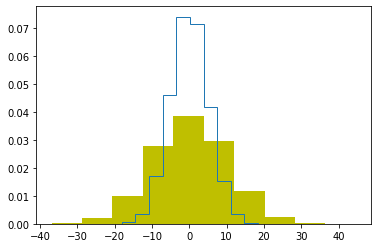

In [22]:
# PDF with default bins
plt.hist(norm,color='y',density=True);#density=True make PDE (normalized)
plt.hist(norm2,density=True,histtype='step');

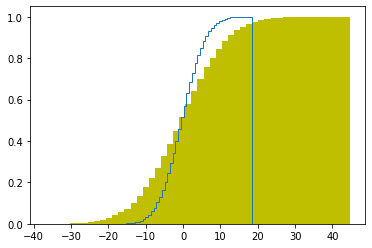

In [23]:
# CDF
plt.hist(norm,bins=50,density=True,cumulative=True,histtype='barstacked',color='y');
plt.hist(norm2,bins=50,density=True,cumulative=True,histtype='step');

In [24]:
m1=np.mean(norm)
m2=np.mean(norm2)
[m1,m2]

[0.22433267710454885, -0.014745744801592636]

In [25]:
me1=np.median(norm)
me2=np.median(norm2)
[me1,me2]

[0.2655513780331034, -0.04002854631870857]

The mean, median, and mode of a normal distribution are equal

In [26]:
[int(stats.skew(norm)),int(stats.skew(norm2))]

[0, 0]

In [27]:
[stats.kurtosis(norm),stats.kurtosis(norm2)]

[0.054786700456256554, -0.05223258895531835]

In [28]:
stats.tstd(norm)

10.026454086753475

# Pareto distribution 

In [18]:
par=np.random.pareto(50,1000)*100;
par2=np.random.pareto(75,1000)*100;

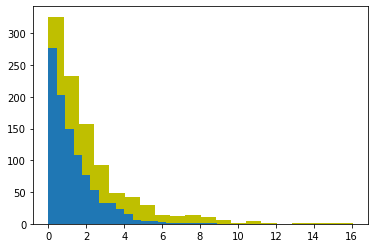

In [19]:
plt.hist(par,bins=20,color='y');
plt.hist(par2,bins=20);

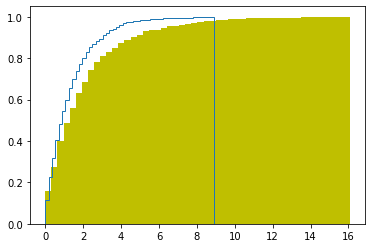

In [20]:
# CDF
plt.hist(par,bins=50,density=True,cumulative=True,histtype='barstacked',color='y');
plt.hist(par2,bins=50,density=True,cumulative=True,histtype='step');

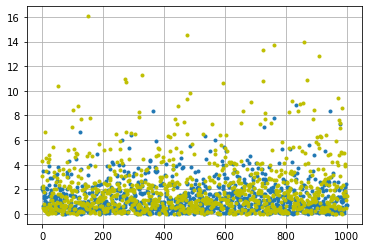

In [21]:
plt.plot(par2,'.')
plt.plot(par,'y.')

plt.grid()

In [22]:
[np.mean(par),np.mean(par2)]

[2.0430932373099204, 1.325792234151972]

In [23]:
[np.median(par),np.median(par2)]


[1.352149140076364, 0.9483188755804006]

In [79]:
stats.mode(par)

ModeResult(mode=array([0.00020593]), count=array([1]))

In [24]:
[stats.skew(par),stats.skew(par2)]

[2.2837748340549413, 1.8915294529784132]

In [25]:
[stats.kurtosis(par),stats.kurtosis(par2)]

[6.857330933523706, 5.0028818978999166]

# Real Data

In [2]:
import pandas_datareader as dr

In [3]:
dft=dr.data.get_data_yahoo('TSLA',start='2019-05-30',end='2020-05-30')
dft=dft.reset_index(level=0)

In [4]:
mode=float(stats.mode(dft['Close'])[0])
mode

43.92399978637695

In [5]:
np.median(dft['Close'])

68.46199798583984

In [14]:
stock_mean=np.mean(dft['Close'])

In [15]:
stock_std=np.std(dft['Close'])

In [7]:
stats.kurtosis(dft['Close'])

-0.9965896983782376

In [8]:
stats.skew(dft['Close'])

0.6972671189180419

# Comparison Tble

In [97]:
data = [['Uniform',np.mean(unif),np.median(unif),float(stats.mode(unif)[0]),stats.tstd(unif),stats.skew(unif),stats.kurtosis(unif)],
       
        ['Normal',np.mean(norm),me1,float(stats.mode(norm)[0]),stats.tstd(norm),float(stats.skew(norm)),stats.kurtosis(norm)],
        
        ['Pareto',np.mean(par),np.median(par),float(stats.mode(par)[0]),stats.tstd(par),stats.skew(par),stats.kurtosis(par)],
        
        ['TeslaStockPrice',np.mean(dft['Close']),np.median(dft['Close']),stats.tstd(dft['Close']),mode,stats.skew(dft['Close']),stats.kurtosis(dft['Close'])]]

df = pd.DataFrame(data,columns=['Name','Mean','Median','Mode', 'StandardDeviation','Skewness','Kurtosis'])
df

,Name,Mean,Median,Mode,StandardDeviation,Skewness,Kurtosis
0,Uniform,0.494452,0.491331,0.000009,0.289148,0.017779,-1.200625
1,Normal,-0.036336,0.099099,-36.089712,10.032716,-0.011011,-0.052144
2,Pareto,2.043093,1.352149,0.000206,2.218438,2.283775,6.857331
3,TeslaStockPrice,85.959732,68.461998,43.946560,43.924000,0.697267,-0.996590


# Standard Scaling (standard normalin)

In [17]:
new_Close=[]
for i in range(len(dft['Close'])):
    hi=(dft['Close'][i]-stock_mean)/stock_std
    new_Close.append(hi)

In [33]:
len(dft['Close'])
hi

1.8477047636073338

In [32]:
len(norm)

10000

In [19]:
stats.tstd(new_Close)

1.0019743355844801

(array([89., 23., 32., 18., 20., 10.,  8., 21., 28.,  5.]),
 array([-1.14377047, -0.80703972, -0.47030896, -0.1335782 ,  0.20315256,
         0.53988331,  0.87661407,  1.21334483,  1.55007559,  1.88680635,
         2.2235371 ]),
 <a list of 10 Patch objects>)

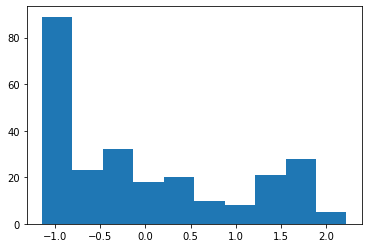

In [48]:
plt.hist(new_Close,10)

In [35]:
new_norm=[]
for i in range(len(norm)):
    hi=(norm[i]-stock_mean)/stock_std
    new_norm.append(hi)

In [36]:
stats.tstd(new_norm)

0.22860150318860323

(array([   6.,   13.,   49.,  130.,  291.,  511.,  973., 1294., 1529.,
        1603., 1390., 1016.,  626.,  332.,  161.,   51.,   17.,    3.,
           2.,    3.]),
 array([-2.80163972, -2.70867523, -2.61571074, -2.52274625, -2.42978177,
        -2.33681728, -2.24385279, -2.15088831, -2.05792382, -1.96495933,
        -1.87199484, -1.77903036, -1.68606587, -1.59310138, -1.5001369 ,
        -1.40717241, -1.31420792, -1.22124344, -1.12827895, -1.03531446,
        -0.94234997]),
 <a list of 20 Patch objects>)

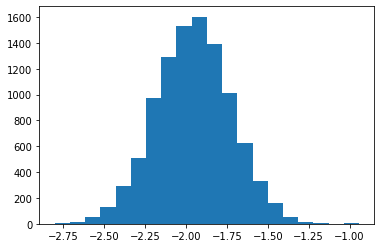

In [38]:
plt.hist(new_norm,20)

In [46]:
np.mean(new_norm)

-1.9547530061505374

In [17]:
?np.random.poisson

In [38]:
pos1=np.random.poisson(1,size=10000)
pos10=np.random.poisson(5,size=10000)
pos20=np.random.poisson(10,size=10000)

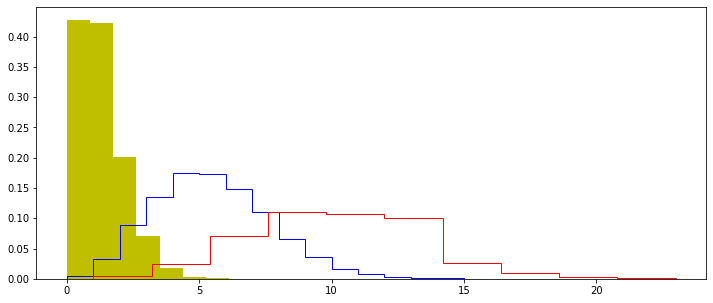

In [48]:
fig=plt.figure(figsize=(12,5))
plt.hist(pos1,density=True,color='y',histtype='barstacked',bins=8);
plt.hist(pos10,density=True,color='b',histtype='step',bins=15);
plt.hist(pos20,density=True,color='r',histtype='step',bins=10);

In [40]:
?plt.hist